## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [10]:
gdp_df.shape

(8219, 4)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis = 1)

In [13]:
gdp_df = gdp_df.set_axis(['Country', 'Year', 'GDP_Per_Capita'], axis=1)

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [16]:
table = gdp_df.pivot_table(gdp_df, index =['Year', 'Country'])

In [17]:
table

GDP_Per_Capita
Year Country                                    
1990 Africa Eastern and Southern     3386.854480
     Africa Western and Central      3299.401375
     Albania                         5327.747458
     Algeria                        11728.545729
     Andorra                        50036.300776
...                                          ...
2023 Viet Nam                       13491.879417
     West Bank and Gaza              5313.097903
     World                          20604.121950
     Zambia                          3673.484197
     Zimbabwe                        3442.251327

[8219 rows x 1 columns]

In [18]:
yearcounts = gdp_df.groupby(['Country'])['Year'].count()
yearcounts.reset_index()

,Country,Year
0,Afghanistan,24
1,Africa Eastern and Southern,34
2,Africa Western and Central,34
3,Albania,34
4,Algeria,34
...,...,...
242,Virgin Islands,21
243,West Bank and Gaza,30
244,World,34
245,Zambia,34


In [19]:
total_years = gdp_df['Year'].nunique()
print(f"Total number of unique years: {total_years}")

Total number of unique years: 34


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

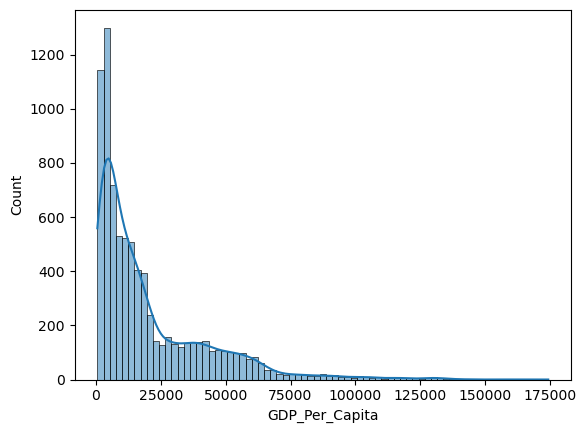

In [21]:
sns.histplot( data=gdp_df["GDP_Per_Capita"], kde=True )

9. What was the median GDP per capita value in 2020?